Populating the interactive namespace from numpy and matplotlib


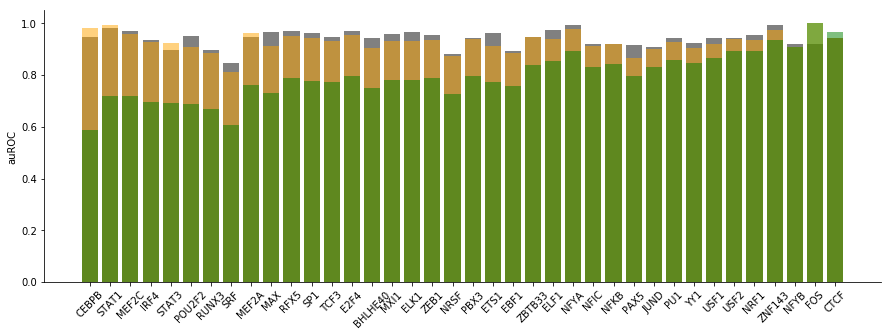

In [35]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import pandas as pd

data = pd.read_csv("agentbind-modelcontrols.csv")

data["diff-GC"] = data.apply(lambda x: x["auROC-GC"]-x["auROC-all"], 1)
data["diff-Dnase"] = data.apply(lambda x: x["auROC-GC-Dnase"]-x["auROC-GC"], 1)
data["sizediff-GC"] = data.apply(lambda x: (x["total-GC"])*1.0/x["total-all"], 1)
data["sizediff-Dnase"] = data.apply(lambda x: (x["total-GC-Dnase"])*1.0/x["total-GC"], 1)

data = data.sort_values("diff-Dnase", ascending=True)

# Plot ROCall, ROCgc, ROCDnase
fig = plt.figure()
fig.set_size_inches((15, 5))
ax = fig.add_subplot(111)
ax.bar(range(data.shape[0]), data["auROC-all"], color="gray")
ax.bar(range(data.shape[0]), data["auROC-GC"], color="orange", alpha=0.5)
ax.bar(range(data.shape[0]), data["auROC-GC-Dnase"], color="green", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(range(data.shape[0]))
ax.set_xticklabels(data["TF"], rotation=45)
ax.set_ylabel("auROC")

fig.savefig("pdfs/AgentBind_ED1_ModelCompare.pdf")

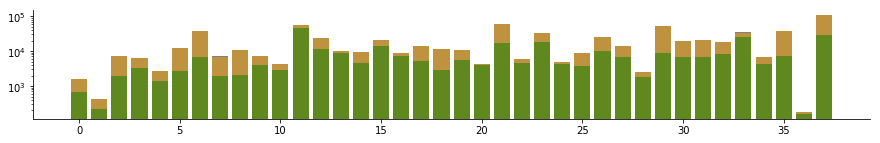

In [42]:
# Plot ROCall, ROCgc, ROCDnase
fig = plt.figure()
fig.set_size_inches((15, 2))
ax = fig.add_subplot(111)
ax.bar(range(data.shape[0]), data["total-all"], color="gray")
ax.bar(range(data.shape[0]), data["total-GC"], color="orange", alpha=0.5)
ax.bar(range(data.shape[0]), data["total-GC-Dnase"], color="green", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.yscale("log")
fig.savefig("pdfs/AgentBind_ED1_ModelCompare-samplesize.pdf")